In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os

In [40]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [41]:
filepath = './cats-vs-dogs/PetImages'
subfolders = os.listdir(filepath)
dog_path = os.path.join(filepath + f'/{subfolders[0]}')
cat_path = os.path.join(filepath + f'/{subfolders[1]}')

In [42]:
cat_path

'./cats-vs-dogs/PetImages/Cat'

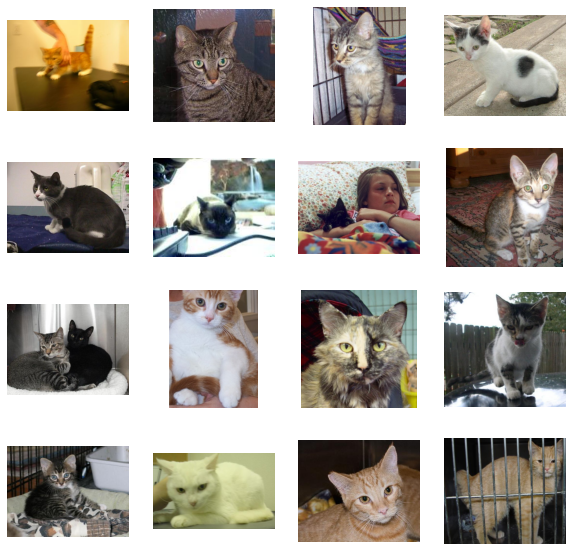

In [43]:
fig = plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = plt.imread(os.path.join(cat_path, str(i) + '.jpg'))
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))

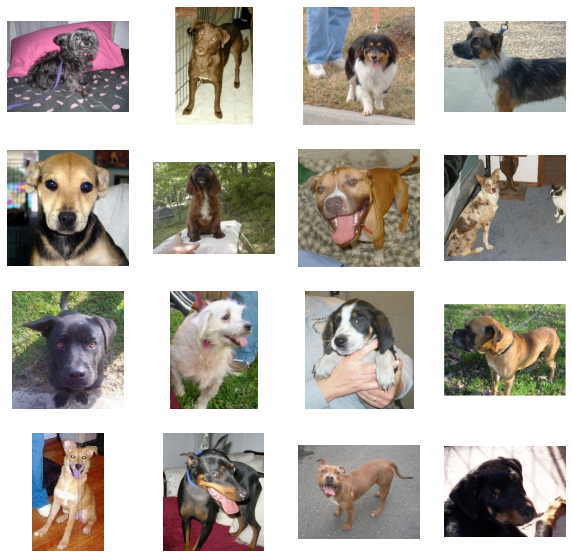

In [44]:
fig = plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = plt.imread(os.path.join(dog_path, str(i) + '.jpg'))
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [45]:
plt.imread(os.path.join(dog_path, str(i) + '.jpg')).shape

(375, 500, 3)

In [46]:
image_gen = ImageDataGenerator(
        rescale = 1/255.0,
        rotation_range = 20,
        zoom_range = 0.05,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        shear_range = 0.05,
        horizontal_flip = True,
        fill_mode = "nearest",
        validation_split = 0.20)

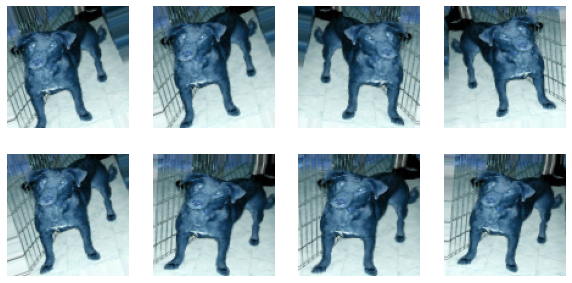

In [47]:
img = cv.imread(os.path.join(dog_path, str(1) + '.jpg'))
img = cv.resize(img, (100,100))
x = np.expand_dims(img, axis=0)

aug_iter = image_gen.flow(x)

aug_images = [next(aug_iter)[0] for i in range(8)]

plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(aug_images[i])
    plt.axis('off')
plt.show()


In [48]:
batch_size=64
train_generator = image_gen.flow_from_directory(
    directory=filepath,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = image_gen.flow_from_directory(
    directory=filepath,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    subset='validation',
    shuffle=True,
    seed=42
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [49]:
# # removing corrupted files

# PIL.ImageFile.LOAD_TRUNCATED_IMAGES = True

# def process_images(image_files):
#     for image_file in image_files:
#         try:
#             with PIL.Image.open(image_file):
#                 pass
#         except PIL.UnidentifiedImageError:
#             print(f"Can't identify image file {image_file}. Deleting.")
#             os.remove(image_file)

# process_images(glob(dog_path + '/*'))
# process_images(glob(cat_path + '/*'))

In [50]:
train_generator.class_indices

{'Cat': 0, 'Dog': 1}